## Домашнее задание 2 (10 баллов)

## Часть 1

В первой части домашнего задания вы попрактикуетесь в работе с библиотекой numpy, которая позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки.

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [1]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return int(np.sum(weights * marks))

In [3]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array: np.array, number: int) -> np.array:
    array[0::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [7]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [8]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.array([abs(array1 - array2) <= precision]).nonzero()[1]

In [9]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [10]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [11]:
def block_matrix(block: np.array) -> np.array:
    new_matrix = np.vstack((block, block))
    new_matrix = np.hstack((new_matrix, new_matrix))
    return new_matrix

In [12]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [13]:
def diag_prod(matrix: np.array) -> int:
    diag = matrix.diagonal()
    return np.prod(diag, where=diag > 0)

In [14]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [15]:
def normalize(matrix: np.array) -> np.array:
    res = (matrix - np.mean(matrix, axis=0)) / np.std(matrix, axis=0)
    return np.nan_to_num(res)

In [16]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [17]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

In [19]:
# Моя проверка: без nan_to_num была бы матрица из nan-ов. Хотя варнинг вылез и здесь (не очень красиво)
matrix = np.zeros((3, 3))

normalize(matrix)



/Users/marimitchurina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Задание 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [20]:
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(coefs)

In [21]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [22]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### Задание 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [23]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix.T + matrix - np.diag(np.diag(matrix))

In [24]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [25]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [26]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.array([np.arange(a, b + 1)] * m)

In [27]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [28]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [29]:
# Косинусная близость = скалярное произведение векторов / (произведение нормы векторов)
from numpy.linalg import norm

def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [30]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [31]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

* Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

* Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test, обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

* Посмотрите на матрицу корреляций факторов и целевой переменной. Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

* Если есть факторы, слабо коррелирующие с таргетом, удалите их.

* Попытайтесь сконструировать новые признаки.

* Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

**Ваша цель**: добиться наилучшего качества по метрике $r^2$ на кросс-валидации.

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


/Users/marimitchurina/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [139]:
df = pd.read_csv('affairs.csv')
df.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [120]:
df.describe()
# Кажется, что в целевой переменной много выбросов: в разбиении по квантилям
# все значения близки к нулю, а максимум - 57

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


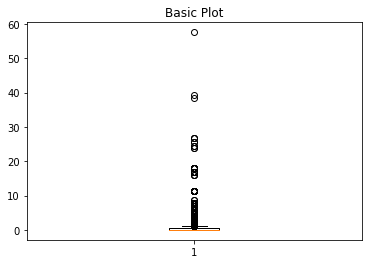

In [121]:
# сплющенная диаграмма размаха
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.affairs)
plt.show()

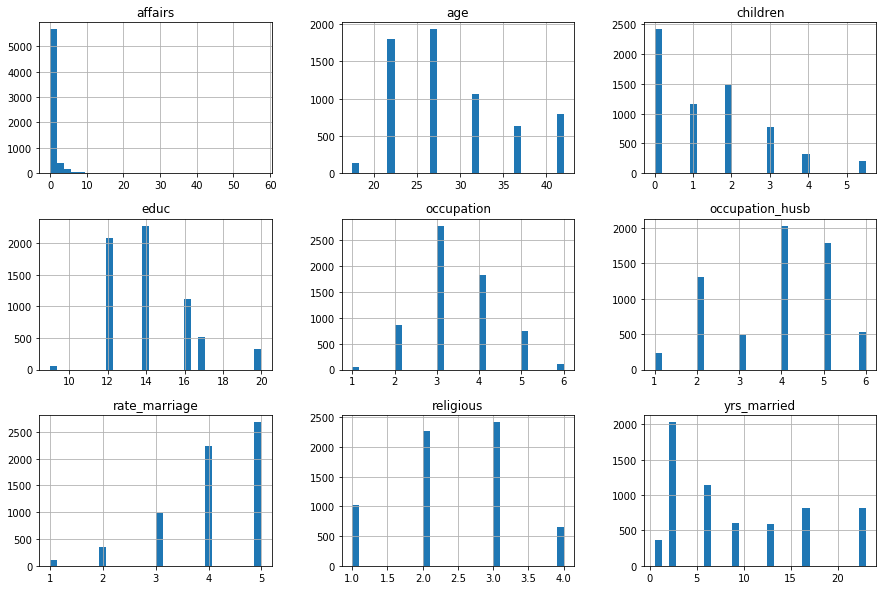

In [122]:
# Посмотрим на распределение всех признаков и целевой переменной

df.hist(bins=30, figsize=(15, 10));

rate_marriage


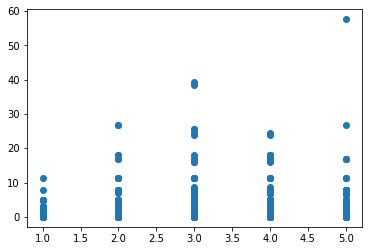

age


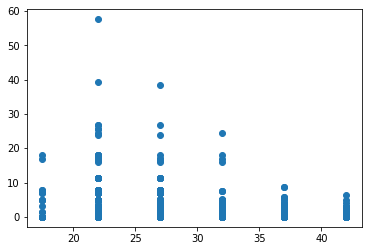

yrs_married


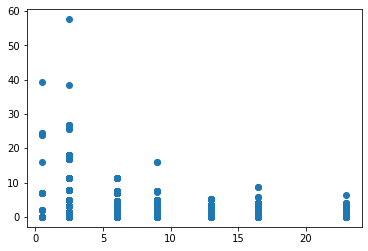

children


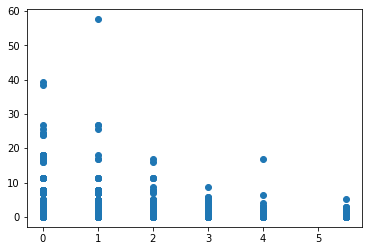

religious


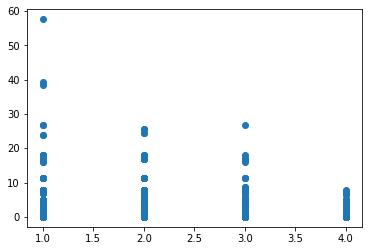

educ


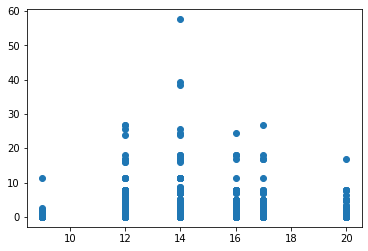

occupation


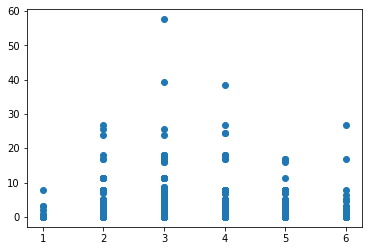

occupation_husb


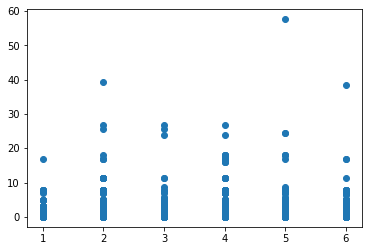

In [123]:
# Зависимость таргета от каждого фактора

for c in df.columns:
    if c != 'affairs':
        print(c)
        scatter(df[c], df['affairs'])
        show()

In [124]:
X = df.drop(['affairs'], axis=1)
y = df.affairs
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


Базовое решение без работы с признаками, нормировкой данных и тд дает плохой результат по кросс-валидации по метрике r^2



In [125]:
print(cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean())

-0.12893334872653028


In [126]:
# Видим, что линейная регрессия "из коробки" работает плохо.
# Хотя бы переобучения нет: на train и test результат одинаково плохой:)

X = df.drop(['affairs'], axis=1)
y = df['affairs']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(Xtrain, ytrain)

ypred_train = model.predict(Xtrain)
ypred_test = model.predict(Xtest)

print(f'''r2 на обучающих данных: {r2_score(ytrain,ypred_train):.3f},
r2 на тестовых данных: {r2_score(ytest,ypred_test):.3f}''')

r2 на обучающих данных: 0.060,
r2 на тестовых данных: 0.041


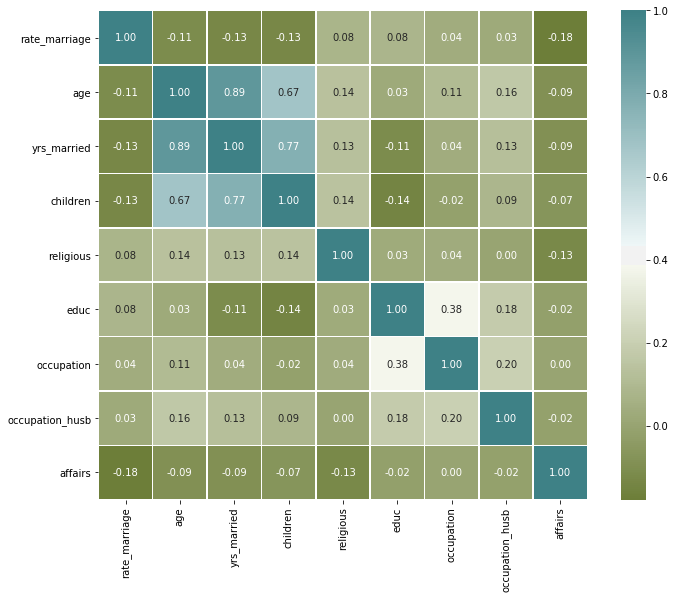

In [127]:
plt.figure(figsize=(12,9))

corr = df.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True);

yrs_married очень сильно коррелирует с age (0.89), а children и с тем, и с тем (больше с yrs_married)
попробуем удалить признак children как менее коррелирующий с affairs и age

In [140]:
del (df['children'], df['age'])

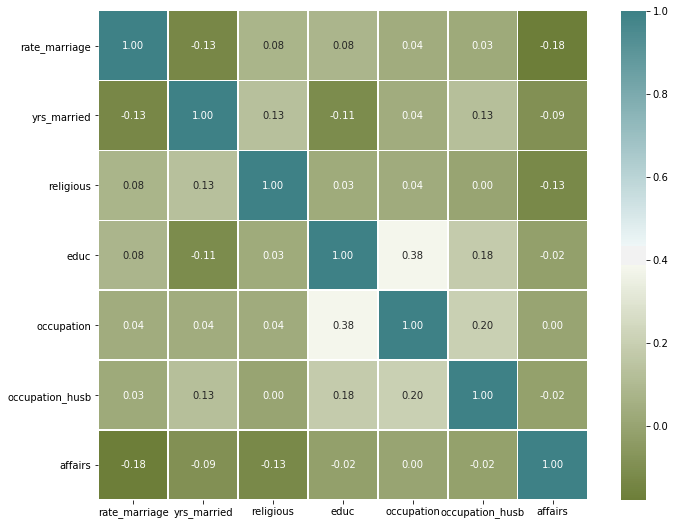

In [141]:
plt.figure(figsize=(12,9))

corr = df.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True);

In [142]:
# Кросс-валидация, на удивление, совсем не поменялась
# (сначала даже была мысль, что там что-то захардкожено, но нет)
X = df.drop(['affairs'], axis=1)
y = df['affairs']
print(X.head())
print(f'''\n\nКросс-вал без age и children:
{cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean():.3f}''')


   rate_marriage  yrs_married  religious  educ  occupation  occupation_husb
0            3.0          9.0        3.0  17.0         2.0              5.0
1            3.0         13.0        1.0  14.0         3.0              4.0
2            4.0          2.5        1.0  16.0         3.0              5.0
3            4.0         16.5        3.0  16.0         5.0              5.0
4            5.0          9.0        1.0  14.0         3.0              4.0


Кросс-вал без age и children:
-0.129


In [135]:
# train стал чуть хуже, test лучше, но все равно плохо
# Позапускав данную ячейку несколько раз, понимаешь, что тут как карты в данных лягут.

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(Xtrain, ytrain)

ypred_train = model.predict(Xtrain)
ypred_test = model.predict(Xtest)

print(f'''r2 на обучающих данных: {r2_score(ytrain,ypred_train):.3f}
r2 на тестовых данных: {r2_score(ytest,ypred_test):.3f}''')

r2 на обучающих данных: 0.053
r2 на тестовых данных: 0.058


Хоть колонки occupation и occupation_husb являются чиселками, они не числовые в нашем понимании. Это лишь коды профессий. сделаем из них one hot encoding-и.

In [143]:
df = pd.get_dummies(df, columns=['occupation', 'occupation_husb'], drop_first=True)
df.head()

,rate_marriage,yrs_married,religious,educ,affairs,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,9.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,13.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,2.5,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,16.5,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,9.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


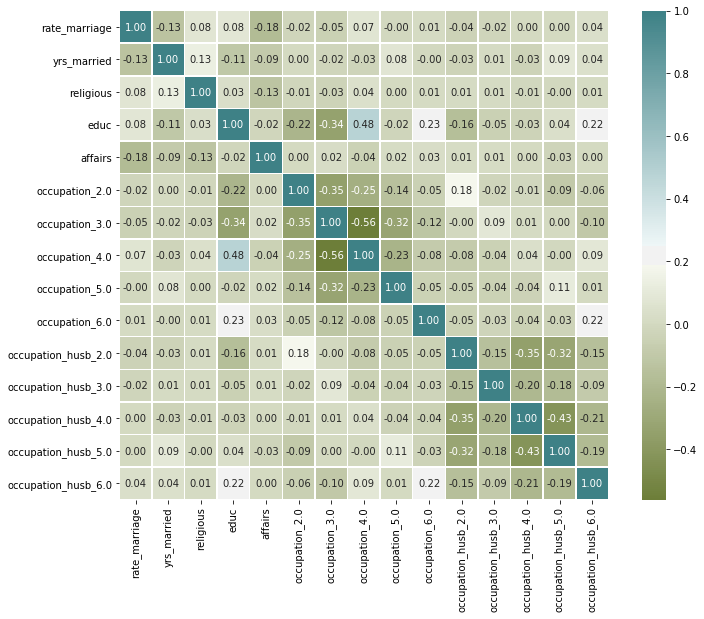

In [144]:
plt.figure(figsize=(12,9))

corr = df.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True);

In [147]:
# Ohe ничего не дал, r2 на кросс-валидации прежний.
# Это логично, тк корреляция этих признаков с целевой переменной мизерная
X = df.drop(['affairs'], axis=1)
y = df['affairs']
print(f'''Кросс-вал с ohe вместо occupations:
{cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean():.3f}''')



Кросс-вал с ohe вместо occupations:
-0.129


In [150]:
# Качество не изменилось

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(Xtrain, ytrain)

ypred_train = model.predict(Xtrain)
ypred_test = model.predict(Xtest)

print(f'''r2 на обучающих данных: {r2_score(ytrain,ypred_train):.3f}
r2 на тестовых данных: {r2_score(ytest,ypred_test):.3f}''')

r2 на обучающих данных: 0.055
r2 на тестовых данных: 0.059


### Есть 2 идеи, как дальше действовать: -->
1. Нормируем наши данные
2. Решаем сначала задачу классификации (0 VS not 0), а дальше задачу линейной регрессии для not 0 - предскажем численные значения.

Посмотрим, сможет ли это улучшить наше качество

In [151]:
y = y.apply(lambda x: 0 if x == 0 else 1)
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affairs, Length: 6366, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train) # алгоритм находит параметры: m и sigma

X_train_sc = scaler.transform(X_train) # нормирует: x->(x-m)/sigma
X_test_sc = scaler.transform(X_test)

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', LogisticRegression())
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(f'Точность классификации на нормированных данных: {accuracy_score(y_test, y_pred):.3f}')

Точность классификации на нормированных данных: 0.729


In [154]:
from sklearn.model_selection import cross_val_score

print(f'Точность классификации на кросс-валидации: {cross_val_score(pipe, X, y, cv=3).mean():.3f}')

Точность классификации на кросс-валидации: 0.722


In [155]:
had_affairs = df[df.affairs > 0]
had_affairs.head()

,rate_marriage,yrs_married,religious,educ,affairs,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,9.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,13.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,2.5,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,16.5,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,9.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [156]:
had_affairs.shape

(2053, 15)

In [157]:
X2 = had_affairs.drop(['affairs'], axis=1)
y2 = had_affairs.affairs
X2.head()

,rate_marriage,yrs_married,religious,educ,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,9.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,13.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,2.5,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,16.5,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,9.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [158]:
y2

0       0.111111
1       3.230769
2       1.400000
3       0.727273
4       4.666666
          ...   
2048    1.217391
2049    0.521739
2050    4.900000
2051    1.507691
2052    0.400000
Name: affairs, Length: 2053, dtype: float64

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

pipe.fit(X2_train, y2_train)
y2_pred = pipe.predict(X2_test)

print(f'Точность регрессии на нормированных данных (только > 0): {r2_score(y2_test, y2_pred):.3f}')

Точность регрессии на нормированных данных (только > 0): 0.105


In [160]:
# Конечно, точность далека от 1, но r2 хотя бы > 0
print(f'''Точность регрессии на кросс-валидации (только > 0):
{cross_val_score(pipe, X2, y2, cv=3, scoring='r2').mean():.3f}''')
      

Точность регрессии на кросс-валидации (только > 0):
0.129


К сожалению, я не знаю, как посмотреть общее качество, соединив классификацию и регрессию. Но есть ощущение, что это уже работает лучше. Есть проблема: в данных гораздо больше affairs == 0, чем иных значений affairs. Так что выборка у нас несбалансированная.